This notebook contains a possible solution for the following machine learning challange: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing .
We have to predict whether a customer will create a bank term deposit or not.

Import python libraries that will be used

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

Import the files from csv with pandas python library.

In [2]:
file_path='bank-additional/bank-additional-full.csv'
bank_data = pd.read_csv(file_path,sep=';')
print(bank_data)

       age            job   marital            education  default  housing  \
0       56      housemaid   married             basic.4y       no       no   
1       57       services   married          high.school  unknown       no   
2       37       services   married          high.school       no      yes   
3       40         admin.   married             basic.6y       no       no   
4       56       services   married          high.school       no       no   
5       45       services   married             basic.9y  unknown       no   
6       59         admin.   married  professional.course       no       no   
7       41    blue-collar   married              unknown  unknown       no   
8       24     technician    single  professional.course       no      yes   
9       25       services    single          high.school       no      yes   
10      41    blue-collar   married              unknown  unknown       no   
11      25       services    single          high.school       n

Visualize the data to make some insight into the data like patterns or outliers
Create a histogram for numeric attributes and check the distribution of each the features.

Variance is the average of the squared differences from the mean. In mathematical terms this would mean:
1/N*sum(X-mu)^2

The std row shows the standard deviation (which measures how dispersed the values are).
The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates
the value below which a given percentage of observations in a group of observations
falls. For example, 25% of the customers are 33 years old, while 50% are 39 and 75% are lower than 49. These are often called the 25th percentile (or 1st quartile), the median, and the 75th percentile (or 3rd quartile).

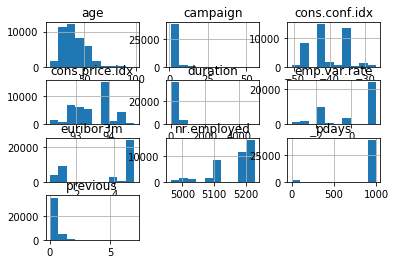

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [3]:
bank_data.hist()
plt.show()
bank_data.describe()

Split the data into categoric and numeric value.
Apply one-hot-encoding to transform categorical data into numeric.
Remove duration column for the more reliable result.

In [4]:
features = bank_data.copy()

categorical_columns = features.select_dtypes('object')
numeric_columns = features.select_dtypes('number')
numeric_columns = numeric_columns[numeric_columns.columns.drop('duration')]
categoric_one_hot_columns = pd.get_dummies(categorical_columns[categorical_columns.columns.drop('y')])

frames = [numeric_columns,categoric_one_hot_columns]
X = pd.concat(frames, axis=1)
X = X.drop(['education_unknown','job_unknown','default_unknown'],axis=1)
y = bank_data.y
print(X.head())

   age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56         1    999         0           1.1          93.994   
1   57         1    999         0           1.1          93.994   
2   37         1    999         0           1.1          93.994   
3   40         1    999         0           1.1          93.994   
4   56         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  job_admin.        ...         \
0          -36.4      4.857       5191.0           0        ...          
1          -36.4      4.857       5191.0           0        ...          
2          -36.4      4.857       5191.0           0        ...          
3          -36.4      4.857       5191.0           1        ...          
4          -36.4      4.857       5191.0           0        ...          

   month_oct  month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  \
0          0          0                0                1                0

Split data so we can use separate datase for train and testing (overfit and underfit problems). 
We will use datas for testing that the model has never seen before.

In [19]:
train_X, val_X, train_y, val_y = train_test_split(X, y,train_size=0.40)

/Users/i337073/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Method that check the performance of the models with the different reguralization parameter 

In [20]:
def calculate_c_parameter(model,svc):
  accuracy_list=[]
  c_parameter_list=[]
  c_parameter_optimalization_range = range(1,15,1)
  max_accuracy = 0
  best_c_par = 0
  for c_parameter in c_parameter_optimalization_range:
    c_value=float('10e-{}'.format(c_parameter))
    print(c_value)
    if svc:
      model = Pipeline((
        ("poly_features", PolynomialFeatures(degree=2)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=c_value, loss="hinge"))))
    else:
      model.C=c_value
    model.fit(train_X,train_y)
    predicted_subscriptions = model.predict(val_X)
    calculated_accuracy = metrics.accuracy_score(val_y, predicted_subscriptions)
    accuracy_list.append(calculated_accuracy)
    c_parameter_list.append(c_parameter)
    if(max_accuracy<calculated_accuracy):
      max_accuracy = calculated_accuracy
      best_c_par=c_value
    print("Accuracy:",calculated_accuracy)
  
  plt.plot(c_parameter_list,accuracy_list)
  plt.show()
  return best_c_par

Choose the one that maximaze the accuracy and create the model with it. 

1.0
Accuracy: 0.9019949014688625
0.1
Accuracy: 0.9017521142718408
0.01
Accuracy: 0.9021972241330474
0.001
Accuracy: 0.9016711852061668
0.0001
Accuracy: 0.900173997491199
1e-05
Accuracy: 0.8992433132359486
1e-06
Accuracy: 0.8992433132359486
1e-07
Accuracy: 0.8992433132359486
1e-08
Accuracy: 0.8896127544207502
1e-09
Accuracy: 0.8896127544207502
1e-10
Accuracy: 0.8896127544207502
1e-11
Accuracy: 0.8896127544207502
1e-12
Accuracy: 0.8896127544207502
1e-13
Accuracy: 0.8896127544207502


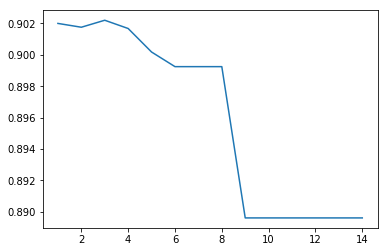

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
log_reg_model = LogisticRegression()
best_c_par = calculate_c_parameter(log_reg_model,False)
log_reg_model = LogisticRegression(C=best_c_par)
log_reg_model.fit(train_X,train_y)

Use the validation dataset to measure the perforamnce of the model.

Precision: What proportion of positive identifications was actually correct?
Recall: What proportion of actual positives was identified correctly?

In [22]:
predicted_subscriptions = log_reg_model.predict(val_X)
cnf_matrix = metrics.confusion_matrix(val_y, predicted_subscriptions)
model_accuracy = metrics.accuracy_score(val_y, predicted_subscriptions)
print("Confusion matrix: \n",cnf_matrix)
print(classification_report(val_y,predicted_subscriptions))
print("Accuracy: ",model_accuracy)

Confusion matrix: 
 [[21704   281]
 [ 2144   584]]
             precision    recall  f1-score   support

         no       0.91      0.99      0.95     21985
        yes       0.68      0.21      0.33      2728

avg / total       0.88      0.90      0.88     24713

Accuracy:  0.9018735078703516


The coefficient of the features in show the importance of feature in the prediction.
The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the median house value tends to go up when the median income goes up. When the coefficient is close to –1, it means that there is a strong negative correlation;  Finally, coefficients close to zero mean that there is no linear correlation. Figure 2-14 shows various plots along with the correlation coefficient between their horizontal and vertical axes.

However, It does not tell us how exactly those features play a role in prediction. And the relatively low ranking of occupation seems counterintuitive.

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default_no', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_

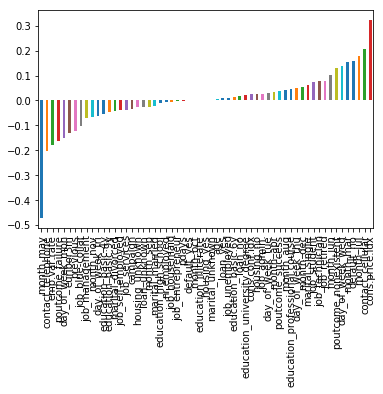

cons.price.idx                   0.322480
contact_cellular                 0.205878
month_jul                        0.179705
default_no                       0.156455
month_mar                        0.153134
day_of_week_wed                  0.138170
poutcome_nonexistent             0.130280
month_jun                        0.100490
job_retired                      0.078769
job_technician                   0.078423
job_student                      0.074743
marital_single                   0.061766
month_dec                        0.053361
day_of_week_thu                  0.049891
education_professional.course    0.046056
month_aug                        0.041874
poutcome_success                 0.036153
month_apr                        0.033288
day_of_week_tue                  0.030060
job_admin.                       0.025991
housing_no                       0.025486
cons.conf.idx                    0.025391
education_university.degree      0.020752
loan_no                          0

In [23]:
coefs = pd.Series(log_reg_model.coef_[0], index=train_X.columns)
print(train_X.columns)
coefs = coefs.sort_values()
plt.subplot(1,1,1)
coefs.plot(kind="bar")
plt.show()
print(coefs.sort_values(ascending = False))

Try to create an Non-linear SVM Classification

In [26]:
#svm_model = Pipeline((
#        ("poly_features", PolynomialFeatures(degree=2)),
#        ("scaler", StandardScaler()),
#        ("svm_clf", LinearSVC(C=1, loss="hinge"))))
#best_c_par = calculate_c_parameter(svm_model,True)

svm_model = Pipeline((
        ("poly_features", PolynomialFeatures(degree=2)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=0.1, loss="hinge"))))
svm_model.fit(train_X, train_y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

Check the preaformance of the model

Precision and Recall:
Recall: Is the total number of "Yes" in the label column of the dataset. So how many "Yes" labels does our model detect. 

Precision: Means how sure is the prediction of our model that the actual label is a "Yes".

In [25]:
predicted_subscriptions = svm_model.predict(val_X)
cnf_matrix = metrics.confusion_matrix(val_y, predicted_subscriptions)
model_accuracy = metrics.accuracy_score(val_y, predicted_subscriptions)
print("Confusion matrix: \n",cnf_matrix)
print(classification_report(val_y,predicted_subscriptions))
print("Accuracy: ",model_accuracy)

Confusion matrix: 
 [[21023   962]
 [ 1881   847]]
             precision    recall  f1-score   support

         no       0.92      0.96      0.94     21985
        yes       0.47      0.31      0.37      2728

avg / total       0.87      0.88      0.87     24713

Accuracy:  0.8849593331444988
